In [1]:
import numpy as np
import pandas as pd
import xarray
import seaborn as sns
import matplotlib.pyplot as plt

![WhatsApp Image 2025-01-15 at 00.28.34_11d036ee.jpg](<attachment:WhatsApp Image 2025-01-15 at 00.28.34_11d036ee.jpg>)
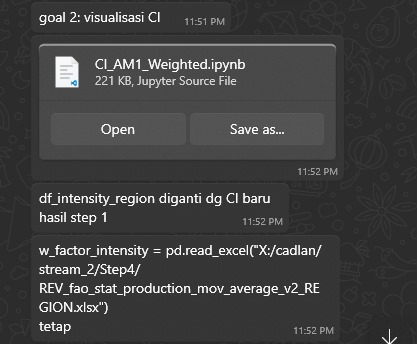

In [24]:
# ini emisi total
df_intensity_region = pd.read_csv(r"D:\kerja\asisten riset\januari\CI_emisi_total_FAO_AM1_now.csv")
w_factor_intensity =  pd.read_excel("D:/kerja/asisten riset/code v/review/REV_fao_stat_production_mov_average_v2_REGION.xlsx", engine='openpyxl')

In [187]:
df_ittertols = pd.read_excel("D:/kerja/asisten riset/code v/review/CF_emisi_total_GFRAC_AM1.xlsx")
df_ittertols = df_ittertols.rename(columns={'type': 'NGFBFC'})
df_ittertols['CF'] = df_ittertols['CF'].replace([np.inf, -np.inf], np.nan)
df_ittertols['CF'] = df_ittertols['CF'].fillna(0)
df_ittertols.loc[df_ittertols['CF'] > 50, 'CF'] = 0
df_ittertols['NGFBFC'] = df_ittertols['NGFBFC'].str.lower()
df_ittertols['NGFBFC'] = df_ittertols['NGFBFC'].str.replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices').replace('other temperate cereals', 'temperate cereals')
df_ittertols = df_ittertols.drop(columns=['Unnamed: 0', 'CF'])
df_ittertols['NGFBFC'].unique()

array(['maize', 'palm oil', 'non food, luxury, spices',
       'temperate cereals', 'plant based fibres', 'pulses', 'rice',
       'soybeans', 'sugar crops', 'temperate oil crops',
       'temperate roots & tubers', 'tropical cereals',
       'tropical oil crops', 'tropical roots & tubers',
       'vegetables & fruits', 'wheat'], dtype=object)

In [188]:
df1b = df_intensity_region.copy()
df3 = w_factor_intensity.copy()

In [189]:
df1b = df1b.rename(columns={'type': 'NGFBFC'})
df1b['Carbon Intensity'] = df1b['Carbon Intensity'].replace([np.inf, -np.inf], np.nan)
df1b['Carbon Intensity'] = df1b['Carbon Intensity'].fillna(0)

In [190]:
df1b.loc[df1b['Carbon Intensity'] > 50, 'Carbon Intensity'] = 0
df1b = df1b[df1b['time'] > 1970]
df1b['NGFBFC'] = df1b['NGFBFC'].str.lower()
df1b['NGFBFC'] = df1b['NGFBFC'].str.replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices').replace('other temperate cereals', 'temperate cereals')
df1b['NGFBFC'].unique()

array(['maize', 'palm oil', 'non food, luxury, spices',
       'temperate cereals', 'plant based fibres', 'pulses', 'rice',
       'soybeans', 'sugar crops', 'temperate oil crops',
       'temperate roots & tubers', 'tropical cereals',
       'tropical oil crops', 'tropical roots & tubers',
       'vegetables & fruits', 'wheat'], dtype=object)

In [191]:
df3_copy = df3.rename(columns={'type': 'NGFBFC'})
df3_copy = df3_copy[df3_copy['time'] > 1970]
df3_copy['NGFBFC'] = df3_copy['NGFBFC'].str.lower()
df3_copy['NGFBFC'] = df3_copy['NGFBFC'].str.replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices').replace('other temperate cereals', 'temperate cereals')
df3_copy['NGFBFC'].unique()

array(['maize', 'palm oil', 'non food, luxury, spices',
       'temperate cereals', 'plant based fibres', 'pulses', 'rice',
       'soybeans', 'sugar crops', 'temperate oil crops',
       'temperate roots & tubers', 'tropical cereals',
       'tropical oil crops', 'tropical roots & tubers',
       'vegetables & fruits', 'wheat'], dtype=object)

In [192]:
df3_melted_region_columns_groupby = df3_copy.groupby(['IMAGE Region Name','NGFBFC', 'time']).sum()
df3_melted_region_index = df3_melted_region_columns_groupby.reset_index()
df3_melted_region_index

,IMAGE Region Name,NGFBFC,time,FAO Production
0,Brazil,maize,1975,1.676013e+07
1,Brazil,maize,1980,1.864145e+07
2,Brazil,maize,1985,2.184828e+07
3,Brazil,maize,1990,2.536353e+07
4,Brazil,maize,1995,3.228221e+07
...,...,...,...,...
3885,W. Europe,wheat,2000,9.979275e+07
3886,W. Europe,wheat,2005,9.982810e+07
3887,W. Europe,wheat,2010,1.054427e+08
3888,W. Europe,wheat,2015,1.074069e+08


In [195]:
df_itertools_copy1 = df_ittertols.copy()
df_itertools_copy1["Carbon Intensity"] = 0.0
df1b_copy = df_itertools_copy1.merge(df1b , how='left', left_on=['IMAGE Region Name', 'time', 'NGFBFC'], right_on=['IMAGE Region Name', 'time', 'NGFBFC'],)
df1b_copy = df1b_copy.drop(columns=['Carbon Intensity_x']).rename(columns={"Carbon Intensity_y": "Carbon Intensity"})

df_itertools_copy2 = df_ittertols.copy()
df_itertools_copy2["FAO Production"] = 0.0
df3_copy = df_itertools_copy2.merge(df3_melted_region_index , how='left', left_on=['IMAGE Region Name', 'time', 'NGFBFC'], right_on=['IMAGE Region Name', 'time', 'NGFBFC'],)
df3_copy = df3_copy.drop(columns=['FAO Production_x']).rename(columns={"FAO Production_y": "FAO Production"})

In [196]:
data1 = np.zeros((10, 16, 26), dtype='float32')
average_AreaHarvested_RegionCrops = np.zeros((10, 16, 26), dtype='float32')
result_average = np.zeros((16, 10), dtype='float32')

In [197]:
for n, time in enumerate(range(1975, 2021, 5)):
    for i, ngfbfc in enumerate(df1b_copy['NGFBFC'].unique()):
        for j, image_region in enumerate(df3_copy['IMAGE Region Name'].unique()):
            ngfbfc_areaharves = df3_copy[(df3_copy['time'] == time) & (df3_copy['IMAGE Region Name'] == image_region) & (df3_copy['NGFBFC'] == ngfbfc)]['FAO Production'].replace([np.inf, -np.inf], np.nan).values
            average_AreaHarvested_RegionCrops[n][i][j] = np.nan_to_num(ngfbfc_areaharves)

In [198]:
for n, time in enumerate(range(1975, 2021, 5)):
    for i, ngfbfc in enumerate(df1b_copy['NGFBFC'].unique()):
        carbon_footprint = df1b_copy[(df1b_copy['time'] == time) & (df1b_copy['NGFBFC'] == ngfbfc)]['Carbon Intensity'].replace([np.inf, -np.inf], np.nan).values
        data1[n][i] = np.nan_to_num(carbon_footprint)

In [200]:
for i, ngfbfc in enumerate(df1b_copy['NGFBFC'].unique()):   
    for n, time in enumerate(range(1975, 2021, 5)):
        try:
            result_average[i][n] = np.average(data1[n][i], weights=average_AreaHarvested_RegionCrops[n][i])
        except:
            print(ngfbfc, time)

result_average

array([[0.85727894, 0.49674636, 0.63953054, 0.7472716 , 0.7495208 ,
        0.3923033 , 0.36080113, 0.2801426 , 0.23379105, 0.25849226],
       [0.3409007 , 2.3469858 , 0.6024198 , 0.98978925, 0.38131544,
        1.0648566 , 1.1568036 , 1.0312307 , 0.5126566 , 0.65116054],
       [5.5216637 , 4.098673  , 5.538157  , 3.2489974 , 5.2245536 ,
        2.865301  , 3.4159353 , 1.8192623 , 0.9025387 , 1.0483637 ],
       [0.20396991, 0.271917  , 0.27717638, 0.3035449 , 0.43710917,
        0.15816803, 0.2715981 , 0.2055389 , 0.1046427 , 0.27726027],
       [1.6118677 , 0.97178024, 1.2893087 , 0.7667718 , 0.8946793 ,
        0.55955946, 0.38663268, 0.3580569 , 0.26109737, 0.50470793],
       [2.9533412 , 3.7069376 , 1.8963281 , 1.5465668 , 2.3567522 ,
        0.9077498 , 1.115248  , 0.7848236 , 0.50203544, 0.64979446],
       [1.7875913 , 1.2597569 , 0.93258506, 0.83202356, 0.66521436,
        0.5692693 , 0.5751951 , 0.68260276, 0.5544016 , 0.5406041 ],
       [2.195788  , 1.3826158 , 1.6600751

In [201]:
df_avg = pd.DataFrame(result_average, index=[df3_copy['NGFBFC'].unique()], columns=list(range(1975, 2021, 5)))
df_avg = df_avg.reset_index()
df_avg = df_avg.rename(columns={"level_0":'NGFBFC'})
df_avg_melt = pd.melt(
    df_avg, 
    id_vars=["NGFBFC"],  # Kolom yang tetap
    var_name="time",     # Nama kolom untuk nilai tahun
    value_name="value"   # Nama kolom untuk nilai data
)
df_avg = df_avg_melt.sort_values(by=['value', 'NGFBFC'], ascending=[False, False])

results = {}

for category in df_avg['NGFBFC'].unique():
    for time in range(1975, 2021, 5):
        filtered_data = df_avg[(df_avg['NGFBFC'] == category) & (df_avg['time'] == time)]
        sorted_data = filtered_data.sort_values(by='value', ascending=False)
        top_5_data = sorted_data.head(3)
        if time not in results:
            results[time] = {}
        results[time][category] = top_5_data

df_avg = pd.concat([pd.concat(results[year].values()) for year in results.keys()])
df_avg = df_avg.sort_values(by=['time', 'value'], ascending=[True, False])
df_avg['NGFBFC'] = df_avg['NGFBFC'].replace('grass', 'pasture').replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices').replace('other temperate cereals', 'temperate cereals')
df_avg[df_avg['time'] == 1975]

,NGFBFC,time,value
2,"non food, luxury, spices",1975,5.521664
5,pulses,1975,2.953341
12,tropical oil crops,1975,2.336210
7,soybeans,1975,2.195788
6,rice,1975,1.787591
4,plant based fibres,1975,1.611868
11,tropical cereals,1975,1.347522
0,maize,1975,0.857279
9,temperate oil crops,1975,0.500967
13,tropical roots & tubers,1975,0.453539


In [202]:
produk_diulang = np.array([item for item in df_avg[df_avg['time'] == 1980]['NGFBFC'].to_list() for _ in range(1)])
produk_diulang

array(['non food, luxury, spices', 'pulses', 'tropical oil crops',
       'palm oil', 'soybeans', 'rice', 'tropical cereals',
       'plant based fibres', 'temperate oil crops', 'maize',
       'tropical roots & tubers', 'temperate cereals', 'wheat',
       'vegetables & fruits', 'sugar crops', 'temperate roots & tubers'],
      dtype='<U24')

In [203]:
df_footprint_region = df1b.replace([np.inf, -np.inf], np.nan).fillna(0)
df_footprint_region['NGFBFC'] = df_footprint_region['NGFBFC'].replace('grass', 'pasture').replace('oil & palm fruit', 'palm oil').replace('other non-food & luxury & spices', 'non food, luxury, spices').replace('other temperate cereals', 'temperate cereals')
df_footprint_region['IMAGE Region Name'] = df_footprint_region['IMAGE Region Name'].replace('Kazakhstan region', 'Central Asia').replace('C. Europe', 'Central Europe').replace('E. Africa', 'Eastern Africa').replace('N. Africa', 'Northern Africa')
df_footprint_region['IMAGE Region Name'] = df_footprint_region['IMAGE Region Name'].replace('Rest C. America', 'Central America').replace('Rest S. Africa', 'Rest of Southern Africa').replace('Rest S. America', 'Rest of South America')
df_footprint_region['IMAGE Region Name'] = df_footprint_region['IMAGE Region Name'].replace('Rest S. Asia', 'Rest of South Asia').replace('SE. Asia', 'Southeast Asia').replace('Rest S. America', 'Rest of South America')
df_footprint_region['IMAGE Region Name'] = df_footprint_region['IMAGE Region Name'].replace('W. Africa', 'Western Africa').replace('W. Europe', 'Western Europe').replace('Russia', 'Russia region')
df_footprint_region['IMAGE Region Name'] = df_footprint_region['IMAGE Region Name'].replace('Indonesia', 'Indonesia region').replace('China', 'China region').replace('Korea', 'Korea region')

df_footprint_region_table = pd.pivot_table(data=df_footprint_region, index=['NGFBFC', 'time'], columns=['IMAGE Region Name'])
df_footprint_region_index = df_footprint_region_table.stack(level=0, future_stack=True)
df_footprint_region_index = df_footprint_region_index.reset_index()
df_footprint_region_index_drop = df_footprint_region_index.drop(columns=['level_2'])
df_footprint_region_index_drop.index = df_footprint_region_index_drop['NGFBFC'].values
df_footprint_region_index_drop.head()

IMAGE Region Name,NGFBFC,time,Brazil,Canada,Central America,Central Asia,Central Europe,China region,Eastern Africa,India,...,Rest of South Asia,Rest of Southern Africa,Russia region,South Africa,Southeast Asia,Turkey,USA,Ukraine region,Western Africa,Western Europe
maize,maize,1975,5.129079,0.933478,10.095862,0.000000,0.224592,1.208737,1.485939,0.181468,...,0.124681,1.111179,0.049475,0.189114,7.223045,0.445129,0.159875,0.000000,0.047728,0.168219
maize,maize,1980,2.246877,4.605801,6.403212,0.000000,0.197977,0.274189,0.229704,0.100470,...,0.161309,1.476313,0.123018,0.163830,7.204911,0.141442,0.137106,0.000000,0.052219,0.195122
maize,maize,1985,1.415181,0.132363,6.850955,0.000000,0.216927,0.827097,0.276305,0.116312,...,0.227209,1.816853,0.150024,0.179870,7.593045,0.122891,0.136986,0.000000,3.931217,0.165479
maize,maize,1990,3.459192,0.721646,4.152600,0.880889,0.166525,0.565099,0.116289,0.118097,...,0.187098,1.554317,0.062537,0.736309,4.645429,0.139689,0.153242,2.394407,1.770803,0.166811
maize,maize,1995,7.354032,0.180225,6.789598,0.087347,0.138965,0.207673,0.200384,0.385352,...,0.233767,0.681277,0.216689,1.309133,0.301314,0.305081,0.129326,0.392491,1.581682,0.144638


In [204]:
def custom_mean(x):
  """Calculates the mean of non-zero values."""
  non_zero_values = x[x > 0]
  return non_zero_values.sum() / len(non_zero_values) if len(non_zero_values) > 0 else 0
  
average1_melt = df_footprint_region_index_drop.melt(id_vars=['NGFBFC', 'time'], value_name='value') 
average1_melt = average1_melt[~((average1_melt['IMAGE Region Name'] == "Canada"))]
average1_melt = average1_melt[~((average1_melt['IMAGE Region Name'] == "Central America"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "tropical cereals") & 
                                      (average1_melt['IMAGE Region Name'] == "Japan"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "palm oil") & 
                                      (average1_melt['IMAGE Region Name'] == "South Africa"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "palm oil") & 
                                      (average1_melt['IMAGE Region Name'] == "Rest of Southern Africa"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "palm oil") & 
                                      (average1_melt['IMAGE Region Name'] == "USA"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "non food, luxury, spices") & 
                                      (average1_melt['IMAGE Region Name'] == "Russia region"))]
average1_melt = average1_melt[~((average1_melt['NGFBFC'] == "soybeans") & 
                                      (average1_melt['IMAGE Region Name'] == "Southeast Asia"))]
average1_melt

,NGFBFC,time,IMAGE Region Name,value
0,maize,1975,Brazil,5.129079
1,maize,1980,Brazil,2.246877
2,maize,1985,Brazil,1.415181
3,maize,1990,Brazil,3.459192
4,maize,1995,Brazil,7.354032
...,...,...,...,...
4155,wheat,2000,Western Europe,0.156202
4156,wheat,2005,Western Europe,0.112646
4157,wheat,2010,Western Europe,0.131241
4158,wheat,2015,Western Europe,0.103672


In [205]:
average1_melt.index = average1_melt['NGFBFC'].values
average1_filtered = average1_melt[average1_melt['value'] < 20]

results = {}
average1_new = average1_filtered.sort_values(by=['value', 'NGFBFC'], ascending=[True, True])

for country in average1_new['IMAGE Region Name'].unique():
    for category in average1_new['NGFBFC'].unique():
        for time in range(1975, 2021, 5):
            filtered_data = average1_new[(average1_new['NGFBFC'] == category) & (average1_new['time'] == time)]
            sorted_data = filtered_data.sort_values(by='value', ascending=False)
            top_5_data = sorted_data.head(3)
            if time not in results:
                results[time] = {}
            results[time][category] = top_5_data

df_footprint_df = pd.concat([pd.concat(results[year].values()) for year in results.keys()])
df_footprint_df_filtered = df_footprint_df[df_footprint_df['value'] < 20]
df_footprint_df_filtered

,NGFBFC,time,IMAGE Region Name,value
maize,maize,1975,Oceania,13.085045
maize,maize,1975,Southeast Asia,7.223045
maize,maize,1975,Brazil,5.129079
"non food, luxury, spices","non food, luxury, spices",1975,Indonesia region,19.648034
"non food, luxury, spices","non food, luxury, spices",1975,Southeast Asia,15.408243
...,...,...,...,...
wheat,wheat,2020,Western Africa,4.707644
wheat,wheat,2020,Rest of Southern Africa,2.283559
palm oil,palm oil,2020,Western Africa,3.094286
palm oil,palm oil,2020,Indonesia region,0.625639


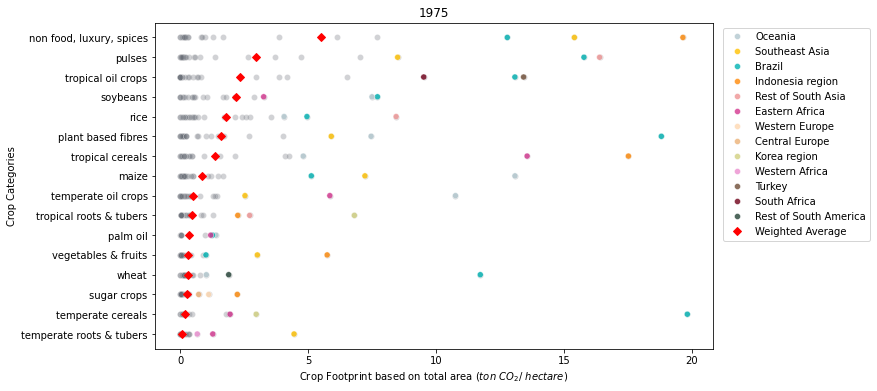

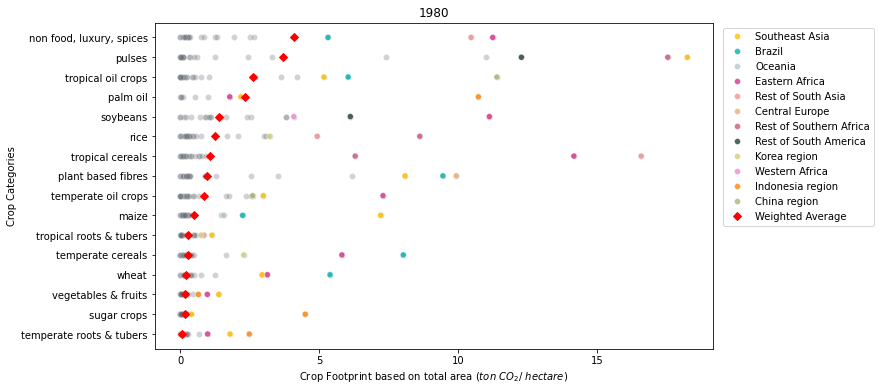

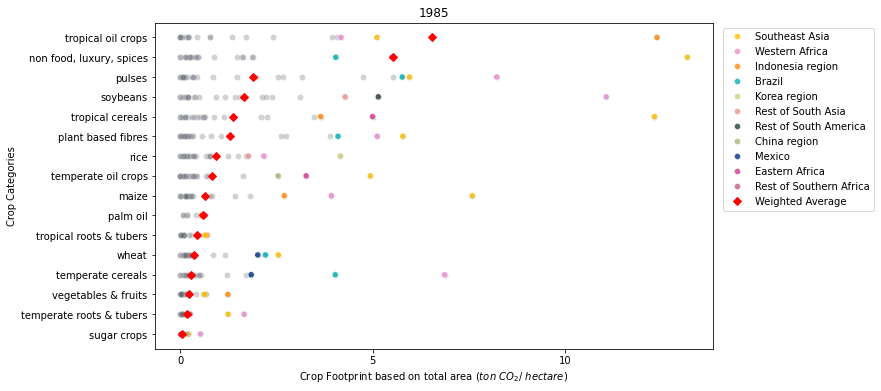

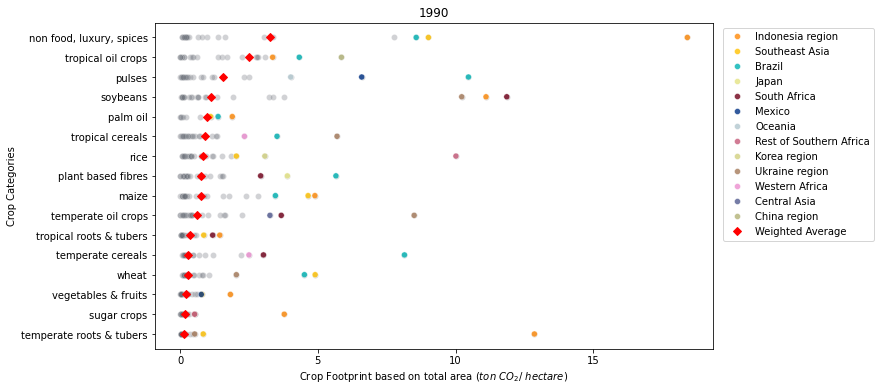

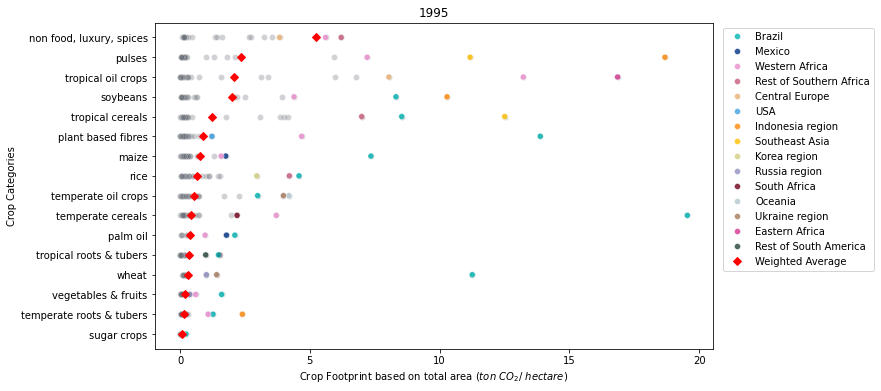

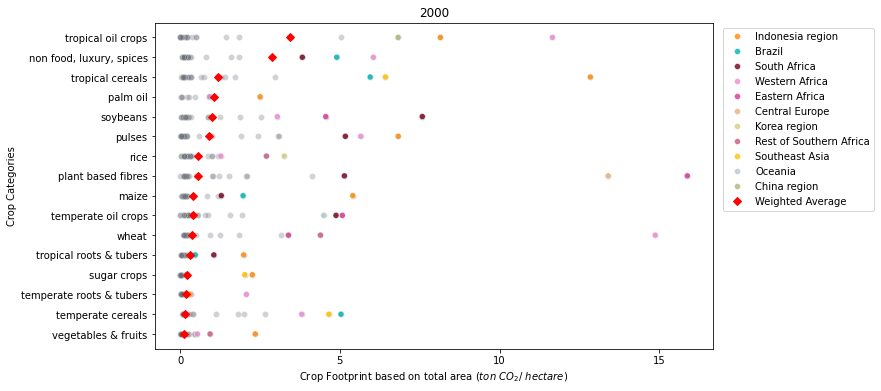

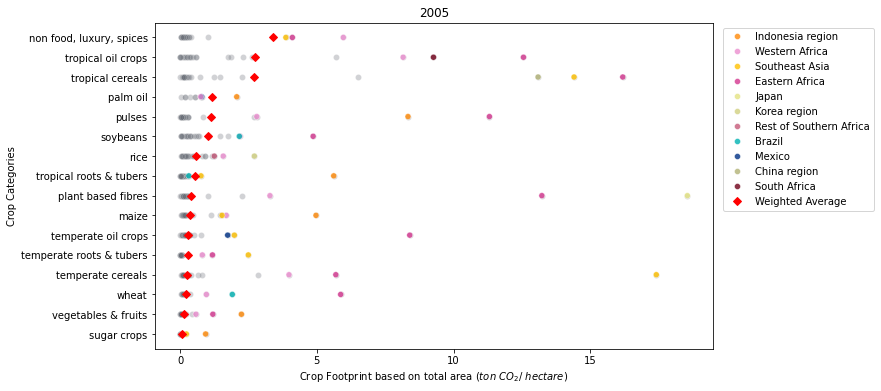

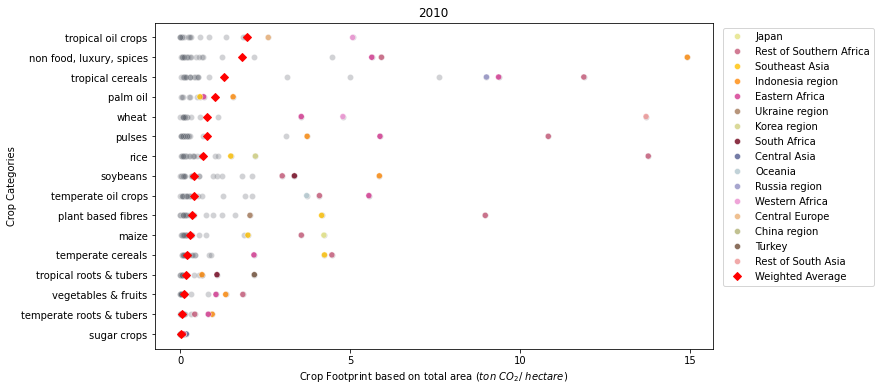

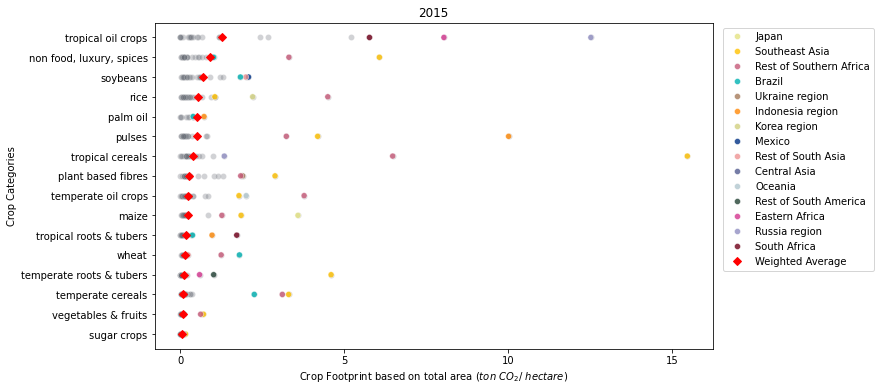

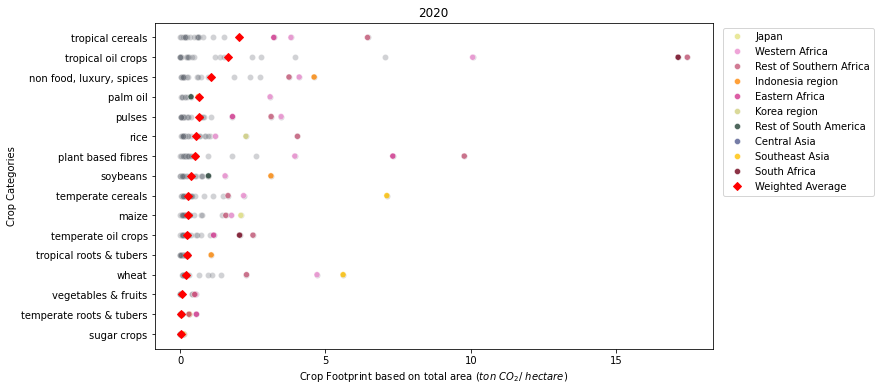

In [206]:
from scipy.interpolate import make_interp_spline
from matplotlib.ticker import MultipleLocator

palettes = {'Oceania': '#B3C8CF','Japan':'#E5E483','Korea region':'#D2D180','China region':'#B2B377','Rest of South Asia':'#EF9595',
                'India':'#EFB495','Indonesia region':'#FF8A08','Southeast Asia':'#FFC100','Middle East':'#1B1A55','Central Asia':'#535C91',
                'Russia region':'#9290C3','Rest of Southern Africa':'#C75B7A','South Africa':'#710019','Eastern Africa':'#D43790',
                'Western Africa':'#EC8FD0','Northern Africa':'#F2C5E0', 'Turkey':'#6F4E37','Ukraine region':'#A67B5B','Central Europe':'#ECB176',
                'Western Europe':'#FED8B1', 'Rest of South America':'#254336','Brazil':'#00b2b2','Central America':'#B3E2A7','Mexico':'#003285',
                'USA':'#40A2E3','Canada':'#BBE2EC'}

for time in range(1975, 2021, 5):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlabel('Crop Footprint based on total area ($ton~CO_2/~hectare$)')
    ax.set_ylabel('Crop Categories')

    plt.title(f"{time}")
    
    produk_diulang = np.array([item for item in df_avg[df_avg['time'] == time]['NGFBFC'].to_list() for _ in range(1)])

    sns.scatterplot(x="value", y="NGFBFC", color='#686D76',
                    sizes=(100, 300), alpha=.3, data=average1_filtered[average1_filtered['time'] == time].loc[produk_diulang])

    sns.scatterplot(x="value", y="NGFBFC", hue='IMAGE Region Name',
                    sizes=(100, 300), alpha=.8, palette=palettes, data=df_footprint_df_filtered[df_footprint_df_filtered['time'] == time])

    ax.legend(bbox_to_anchor=(1.01, 1), ncol=1, loc='upper left')
    ax.plot(df_avg[df_avg['time'] == time].sort_values(by='value', ascending=False)['value'].to_numpy(), df_avg[df_avg['time'] == time].sort_values(by='value', ascending=False)['NGFBFC'].to_numpy(), "D", color='red', label='Weighted Average')
    legend_handles, legend_labels = ax.get_legend_handles_labels()
    weighted_average_index = legend_labels.index('Weighted Average')
    weighted_average_handle = legend_handles.pop(weighted_average_index)
    weighted_average_label = legend_labels.pop(weighted_average_index)
    legend_handles.append(weighted_average_handle)
    legend_labels.append(weighted_average_label)

    ax.legend(handles=legend_handles, labels=legend_labels, bbox_to_anchor=(1.01, 1), ncol=1, loc='upper left')
    ax.xaxis.set_major_locator(MultipleLocator(5))

    plt.show()